In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
df.head() #запись в датафрейм DF csv файла из интернета

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
# мы бы хотели, чтобы User_Score было числом
df.User_Score.unique()
# видим постороннее зачение 'tbd'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
# заменим его на NaN
df.User_Score = df.User_Score.replace('tbd', np.NaN)
df.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [ ]:
# исправим типы данных
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')
df['User_Count'] = df['User_Count'].astype('Int64')
df['User_Score'] = df['User_Score'].astype('float64')
df['Critic_Count'] = df['Critic_Count'].astype('Int64')

# # переводим оценки в один формат
df['User_Score'] = df['User_Score'] * 10

In [ ]:
df.info()
# датафрейм готов к работе

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  Int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   Int64  
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   Int64  
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: Int64(3), float64(7), object(6)
memory usage: 2.1+ MB


In [ ]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,80.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,<NA>,NaN,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,83.0,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,80.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,<NA>,NaN,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN


1.1 Как критики относятся к спортивным играм?

Но = средняя оценка критиков жанра "спортивные игры" = средней оценке критиков по всем жанрам.

H1 = средняя оценка не равна.

alpha = 0.05

In [ ]:
# DF со спортивными играми. В него попали 2348 наименоваий.
df_sport = df.loc[df['Genre'] == 'Sports'] 
df_sport

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,80.0,322,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,80.0,192,Nintendo,E
13,Wii Fit,Wii,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63,77.0,146,Nintendo,E
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33,74.0,52,Nintendo,E
77,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42,43.0,896,EA Sports,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16680,G1 Jockey 4 2008,PS3,2008,Sports,Tecmo Koei,0.00,0.00,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16692,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,Mastiff,T
16697,PGA European Tour,N64,2000,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16704,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN


In [ ]:
# тест Шапиро-Уилка, проверка распределения на нормальность перед применением т-теста
stat, p = stats.shapiro(df_sport.dropna().Critic_Score)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.912, p=0.000
Вероятно не нормальное распределение


In [ ]:
df_nosport = df.loc[df['Genre'] != 'Sports']#Буду сравивать с этим ДФ, куда не входят игры категории "Спорт"
df_nosport

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,<NA>,NaN,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,83.0,709,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,<NA>,NaN,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,<NA>,NaN,<NA>,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,85.0,431,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16713,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN


In [ ]:
#проверка распределения на нормальность, тест Шапиро - Уилка
stat, p = stats.shapiro(df_nosport.dropna()['Critic_Score'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.969, p=0.000
Вероятно не нормальное распределение


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Статистика = 8.08, p = 0.00000000000000071345
Отклоняем нулевую гипотезу, средние, вероятно, различаются


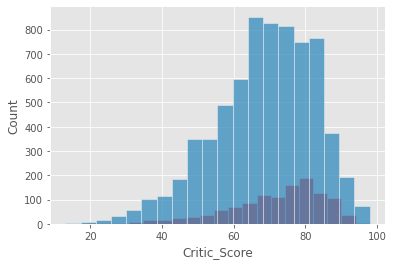

In [ ]:
#Шапиро говорит, что распределение данных отличается от нормального, но мы имеем очень большое количество наблюдений (2348 х 14371)
#поэтому применим т-тест, потому что размер выборки допускает лояльность в отношении этого ограничения, и просто, чтобы посмотреть.
#применим т-критерий для независимых выборок
st, p = stats.ttest_ind(df_sport['Critic_Score'],df_nosport['Critic_Score'], nan_policy= 'omit')

print(f"Статистика = {st:.2f}, p = {p:.20f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

sns.histplot(df_sport['Critic_Score'], bins = 20, color = 'red');
sns.histplot(df_nosport['Critic_Score'], bins = 20);

In [ ]:
#попробуем провести непараметрически тест Манна - Уитни, для сравнения двух выборок, данные в которых распределены ненормальным образом.
#для этого необходимо удалить все nan значения и привести выборки к одинаковому размеру.
df_sport.dropna(subset = ['Critic_Score'], inplace = True)#1194 строки
df_nosport.dropna(subset = ['Critic_Score'], inplace = True)#6943 строки


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# далее формируем из df_nosport выборку из 1194 строк случайным образом.
df_nosport = df_nosport.sample(n = 1194)

In [ ]:
stat, p = stats.mannwhitneyu(df_sport.Critic_Score,df_nosport.Critic_Score)#тест Мана-Уитни подтверждает, что выборки отличаются

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 817631.50000, p = 0.0000000005
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


T-тест говорит, что средняя оценка игр в категории "Спорт" выше средней по остальным играм на 9.36 Р-value говорит, что такое отличие не могло возникнуть случайно. Поэтому отклояем Но и считаем, спортивые игры ценятся критиками выше.

Непараметрический тест Манна-Уитни также говорит, что выборки отличаются.

Я бы хотел, но не придумал как, учииывать количество оценок 'Critic_Count', т.е. имеет значение наверное, сколько именно человек поставили тут или иную оценку.

1.2 Критикам нравятся больше игры на PC или на PS4?

Но = средняя оценка критиков игр на РС равна оценке игр на PS4

H1 = средняя оценка критиков игр на РС выше, чем игр на PS4

alpha = 0.05

In [ ]:
df_pc = df.loc[df.Platform == 'PC'] #ДФ с играми на РС. Всего 974
df_pc

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
85,The Sims 3,PC,2009,Simulation,Electronic Arts,0.99,6.42,0.0,0.60,8.01,86.0,75,76.0,886,The Sims Studio,T
138,World of Warcraft,PC,2004,Role-Playing,Activision,0.08,6.21,0.0,0.00,6.29,93.0,57,73.0,2182,Blizzard Entertainment,T
192,Diablo III,PC,2012,Role-Playing,Activision,2.44,2.16,0.0,0.54,5.14,88.0,86,40.0,9629,Blizzard Entertainment,M
195,Microsoft Flight Simulator,PC,1996,Simulation,Microsoft Game Studios,3.22,1.69,0.0,0.20,5.12,NaN,<NA>,NaN,<NA>,NaN,NaN
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,Activision,2.57,1.68,0.0,0.58,4.84,93.0,82,82.0,3052,Blizzard Entertainment,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16694,Pony Friends 2,PC,2009,Simulation,Eidos Interactive,0.00,0.01,0.0,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.0,0.00,0.01,80.0,20,76.0,412,Kojima Productions,M
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.0,0.00,0.01,61.0,12,58.0,43,Atomic Games,T
16706,STORM: Frontline Nation,PC,2011,Strategy,Unknown,0.00,0.01,0.0,0.00,0.01,60.0,12,72.0,13,SimBin,E10+


In [ ]:
#проверка распределения на нормальность, тест Шапиро - Уилка
stat, p = stats.shapiro(df_pc.dropna()['Critic_Score'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.955, p=0.000
Вероятно не нормальное распределение


In [ ]:
df_ps4 = df.loc[df.Platform == 'PS4']#393 игры для PS4
df_ps4

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,<NA>,NaN,<NA>,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66,83.0,2899,Rockstar North,M
77,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42,43.0,896,EA Sports,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,NaN,<NA>,NaN,<NA>,NaN,NaN
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.0,39,57.0,1443,Sledgehammer Games,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16504,Root Letter,PS4,2016,Adventure,PQube,0.00,0.00,0.01,0.00,0.01,69.0,13,75.0,11,Kadokawa,NaN
16507,Shin Hayarigami 2,PS4,2016,Adventure,Nippon Ichi Software,0.00,0.00,0.01,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16530,Dungeons 2,PS4,2016,Role-Playing,Kalypso Media,0.01,0.00,0.00,0.00,0.01,61.0,9,79.0,14,Kalypso,T
16534,Carmageddon: Max Damage,PS4,2016,Action,Stainless Games,0.01,0.00,0.00,0.00,0.01,51.0,28,55.0,39,Stainless Games,M


In [ ]:
#проверка распределения на нормальность, тест Шапиро - Уилка
stat, p = stats.shapiro(df_ps4.dropna()['Critic_Score'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.932, p=0.000
Вероятно не нормальное распределение


Статистика = 4.54, p = 0.0000062158
Отклоняем нулевую гипотезу, средние, вероятно, различаются


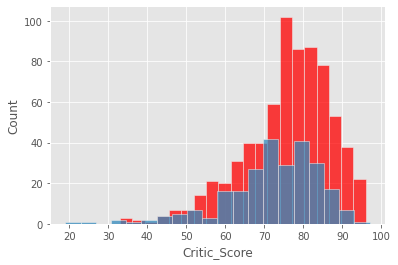

In [ ]:
#применим т-тест, игнорируя данные теста Шапиро о нормалности распределения.
s, pv = stats.ttest_ind(df_pc['Critic_Score'],df_ps4['Critic_Score'], nan_policy='omit')

print(f"Статистика = {s:.2f}, p = {pv:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

sns.histplot(df_pc['Critic_Score'], bins = 20, color = 'red');
sns.histplot(df_ps4['Critic_Score'], bins = 20);

In [ ]:
#попробуем провести непараметрически тест Манна - Уитни, для сравнения двух выборок, данные в которых распределены ненормальным образом.
#для этого необходимо удалить все nan значения и привести выборки к одинаковому размеру.
df_pc.dropna(subset = ['Critic_Score'], inplace = True)#1194 строки
#715 строк
df_ps4.dropna(subset = ['Critic_Score'], inplace = True)#6943 строки
#252

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_pc = df_pc.sample(252)

In [ ]:
stat, p = stats.mannwhitneyu(df_pc.Critic_Score,df_ps4.Critic_Score)#тест Мана-Уитни подтверждает, что выборки отличаются

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 37090.00000, p = 0.0010884682
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


И t-тест, и Манна-Уитниб и график говорит, что оценка критиками игр на РС выше, чем на PS4. Отклонить нулевую гипотезу.

1.3 Критикам больше нравятся стрелялки или стратегии?

Но = средняя оценка критиков игр в жанре "стрелялки" равна оценке игр в жанре "стратегии".

H1 = средняя оценка критиков игр в жанре "стрелялки" не равна оценке игр в жанре "стратегии".

alpha = 0.05

In [ ]:
df_sh = df.loc[df.Genre == 'Shooter']#1323 shooters
df_sh

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,<NA>,NaN,<NA>,NaN,NaN
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81,34.0,8713,"Infinity Ward, Sledgehammer Games",M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,<NA>,NaN,<NA>,NaN,NaN
32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89,63.0,1454,Treyarch,M
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21,53.0,922,Treyarch,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16580,DoDonPachi Daifukkatsu: Black Label,X360,2011,Shooter,Cave,0.00,0.00,0.01,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16581,Space Raiders,GC,2003,Shooter,Taito,0.01,0.00,0.00,0.00,0.01,40.0,8,NaN,<NA>,Taito Corporation,T
16606,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010,Shooter,Activision,0.01,0.00,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12,58.0,43,Atomic Games,T


In [ ]:
#проверка распределения на нормальность, тест Шапиро - Уилка
stat, p = stats.shapiro(df_sh.dropna()['Critic_Score'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.950, p=0.000
Вероятно не нормальное распределение


In [ ]:
df_st = df.loc[df.Genre == 'Strategy']#632 strategies
df_st

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
168,Pokemon Stadium,N64,1999,Strategy,Nintendo,3.18,1.24,0.94,0.09,5.45,NaN,<NA>,NaN,<NA>,NaN,NaN
206,Warzone 2100,PS,1999,Strategy,Eidos Interactive,2.79,1.89,0.00,0.33,5.01,NaN,<NA>,NaN,<NA>,NaN,NaN
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,Activision,2.57,1.68,0.00,0.58,4.84,93.0,82,82.0,3052,Blizzard Entertainment,T
273,Warcraft II: Tides of Darkness,PC,1995,Strategy,Activision,1.70,2.27,0.00,0.23,4.21,NaN,<NA>,NaN,<NA>,NaN,NaN
339,Pokémon Trading Card Game,GB,1998,Strategy,Nintendo,1.49,0.73,1.38,0.10,3.70,NaN,<NA>,NaN,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,Codename: Panzers Complete Collection,PC,2016,Strategy,Nordic Games,0.00,0.01,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN
16644,Hospital Tycoon,PC,2007,Strategy,Codemasters,0.00,0.01,0.00,0.00,0.01,51.0,8,38.0,29,Big Red Software,E10+
16682,End of Nations,PC,2012,Strategy,Trion Worlds,0.01,0.00,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,Petroglyph,T
16685,Worms 2,PC,1997,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01,NaN,<NA>,81.0,12,Team 17,K-A


In [ ]:
#проверка распределения на нормальность, тест Шапиро - Уилка
stat, p = stats.shapiro(df_st.dropna()['Critic_Score'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.970, p=0.000
Вероятно не нормальное распределение


In [ ]:
df_sh.dropna(subset = ['Critic_Score'], inplace = True)
#944 строк
df_st.dropna(subset = ['Critic_Score'], inplace = True)
#302

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_sh = df_sh.sample(302)

In [ ]:
stat, p = stats.mannwhitneyu(df_sh.Critic_Score,df_st.Critic_Score)#тест Мана-Уитни подтверждает, что выборки отличаются

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 44373.00000, p = 0.5665661277
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Статистика = -1.26, p = 0.2076535607
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


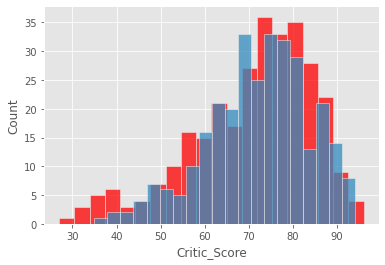

In [ ]:
#проведем также т-тест.
stat, p_v = stats.ttest_ind(df_sh['Critic_Score'],df_st['Critic_Score'], nan_policy='omit')

print(f"Статистика = {stat:.2f}, p = {p_v:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

sns.histplot(df_sh['Critic_Score'], bins = 20, color = 'red');
sns.histplot(df_st['Critic_Score'], bins = 20);

Здесь мы фиксируем, что т-тест утверждает, что при уровне значимости = 0,05 мы отклоняем Но и выборки отличаются, а по результатам Манна-Уитни у нас не достаточно оснований, чтобы отклонить Но. На графике также визуально отличий мы не наблюдаем.

#Задание 2
Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

- Привидите весь текст к нижнему регистру;
- Удалите мусорные символы;
- Удалите стоп-слова;
- Привидите все слова к нормальной форме;
- Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
Можете поэкспериментировать с параметрами TfidfVectorizer;
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
8) Опишите результаты при помощи confusion_matrix;
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
df.head() #запись в датафрейм DF csv файла из интернета

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df_ = df.copy() #создаю копию, потому что впоследствии мне понадобитсяя исходный ДФ

In [ ]:
df_

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
import glob
import re

In [ ]:
df_.Message = df.Message.apply(lambda row: row.lower()).copy()#приведение к нижнему регистру.

In [ ]:
df_.Message = df_['Message'].apply(lambda row: re.sub('[\W_]+', ' ', row))#оставляем в сообщеиях только буквы и цифры, т.е. заменим все, что не буквы и цифры на "ничего"
df_.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [ ]:
import nltk #импортирую библиотеку 
from nltk.corpus import stopwords
nltk.download('stopwords')#загружаю стоп слова
stopwords_set = set(stopwords.words('english'))# записываю в переменную множество стопслов

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(row):#функция для удаления стопслов из датафрейма. В кач-ве аргумента в нее передается строка из ДФ
        processed_word_list = []
        for word in row.split():# В цикле каждая строка разбивается на слова
          if word not in stopwords_set:# слово проверяется на вхождение в множество стоп слов
             processed_word_list.append(word)#если вхождения нет, то слово записывается в список
        return processed_word_list#функция возвращает этот список

In [ ]:
df_.Message = df_.Message.apply(remove_stopwords)#применяю функция к серии. 

In [ ]:
df_#в 5 строке было местоимение he, теперь его нет, будем считать, что функция отработала.

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,"[ü, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestions]"
5570,ham,"[guy, bitching, acted, like, interested, buyin..."


In [ ]:
from nltk.stem import WordNetLemmatizer# скачал библиотеку
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()# записал в переменную метод

In [ ]:
def lemmatizer(row):# функция для лемматизации, принимает из ДФ список
  lemmatized_text = [wordnet_lemmatizer.lemmatize(word) for word in row] # в дикткомпрехеншэн проходит циклом по списку и применяет к каждому слову их списка нужный метод
  return lemmatized_text # возвращает лемматизированный объект

In [ ]:
df_.Message = df_.Message.apply(lemmatizer)#вызываю функцию

In [ ]:
df_#кажется, ничего не произошло.

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, go, usf, life, around, though]"
...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,"[ü, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestion]"
5570,ham,"[guy, bitching, acted, like, interested, buyin..."


In [ ]:
a = 'acted'

In [ ]:
wordnet_lemmatizer.lemmatize(a)# с другой стороны видно, что форма таких слов как going, interested не меняется

'acted'

In [ ]:
df_.Message = df_.Message.apply(lambda row: str(row)) #токенайзер требует, чтобы все были строки

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase = False)
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [ ]:
tfidf_matrix# получилась матрица 5572 х 8048. Это означает, что имеем 5572 сообщения и 8084 слова различных (что очень много кажется)
# а на пересечении вес каждого слова в данном сообщении.


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zac,zealand,zed,zeros,zhong,zoom,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_ = df.Category #в переменную test_ записываем правильные ответы

In [ ]:
test_ = test_.replace('ham',0)

In [ ]:
test_ = test_.replace('spam',1)

In [ ]:
test_ #теперь в проверочном датасете живут нули и единицы

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [ ]:
# Попробуем обучить моделью. разделяем выборку на тренировочную и тестовую
from scipy.sparse.construct import random
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, test_, test_size= 0.3, random_state=42)

In [ ]:
len(y_test)

1672

In [ ]:
y_train.shape

(3900,)

In [ ]:
X_train.shape

(3900, 10857)

In [ ]:
# импортируем LR-функционал
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()#инициируем метод LogisticRegression
lr.fit(X_train, y_train)#обучаем ее на учебных данных

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)#в новую переменную y_pred запишем значения, которые модель формирует на основании своего прогноза 
y_pred#и тестовых значений х

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_pred.shape

(1672,)

In [ ]:
lr.score(X_test,y_test)#коэффициент детерминации нашей модели. Это очень хороший коэффициент.

0.9551435406698564

In [ ]:
from sklearn.metrics import confusion_matrix# та самая матрица

In [ ]:
confusion_matrix(y_test, y_pred)
# я до конца не совсем поимаю, что это значит, но кажется, что было предсказано 1445 нормальных сообщеий, 66 сообщений было ошибочно признаны нормальными
#и 158 спам сообщений + 3 признаны спамом ошибочно.

array([[1448,    0],
       [  75,  149]])

В результате многочисленых переобучений модель изменила свое поведение. Может, выборки по-другому распределились, это буквально при последнем запуске произошло. И теперь она пропустила 75 спам-сообщений, но ни одного нормального сообщения не маркеровала спамом ошибочно.

#9

Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
df_j = pd.merge(y_test, df, left_index=True, right_index=True, how="left")
df_j
# произошло присоединение исходного ДФ, который содержит текст сообщений, к тестовой выборке.

,Category_x,Category_y,Message
3245,0,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
944,0,ham,And also I've sorta blown him off a couple tim...
1044,0,ham,Mmm thats better now i got a roast down me! i...
2484,0,ham,Mm have some kanji dont eat anything heavy ok
812,0,ham,So there's a ring that comes with the guys cos...
...,...,...,...
2505,0,ham,"Hello, my boytoy! I made it home and my consta..."
2525,1,spam,FREE entry into our £250 weekly comp just send...
4975,0,ham,Aiyo u so poor thing... Then u dun wan 2 eat? ...
650,1,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."


In [ ]:
#Как назначить прогнозу такие же индексы, как у теста, я не понял. Нужно больше информации, пожалуйста. Поэтому я использую второй способ = сброс индексов.
df_j.reset_index(drop=True, inplace=True)

#происходит сброс индексов в датафрейме 

In [ ]:
y_pred = pd.DataFrame(y_pred)#массив предсказанных значений преобразовал в ДФ. Мне кажется, надежнее было бы сохранить индексы.


In [ ]:
y_pred.columns=['Category']

In [ ]:
df_merged = pd.merge(df_j, y_pred, left_index=True, right_index=True, how="left")
df_merged
#произошло соединение датафрейма, который содержит сообщения из тестовой выборки и их предсказанные значению. Осталось отфильтровать те, которые не совпадают.

,Category_x,Category_y,Message,Category
0,0,ham,Squeeeeeze!! This is christmas hug.. If u lik ...,0
1,0,ham,And also I've sorta blown him off a couple tim...,0
2,0,ham,Mmm thats better now i got a roast down me! i...,0
3,0,ham,Mm have some kanji dont eat anything heavy ok,0
4,0,ham,So there's a ring that comes with the guys cos...,0
...,...,...,...,...
1667,0,ham,"Hello, my boytoy! I made it home and my consta...",0
1668,1,spam,FREE entry into our £250 weekly comp just send...,1
1669,0,ham,Aiyo u so poor thing... Then u dun wan 2 eat? ...,0
1670,1,spam,"You have won ?1,000 cash or a ?2,000 prize! To...",1


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category_x  1672 non-null   int64 
 1   Category_y  1672 non-null   object
 2   Message     1672 non-null   object
 3   Category    1672 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 52.4+ KB


In [ ]:
df_ham = df_merged[(df_merged.Category_x == 1)&(df_merged.Category == 0)]

In [ ]:
df_ham

,Category_x,Category_y,Message,Category
40,1,spam,Reminder: You have not downloaded the content ...,0
47,1,spam,Guess what! Somebody you know secretly fancies...,0
73,1,spam,Todays Voda numbers ending 5226 are selected t...,0
74,1,spam,Oh my god! I've found your number again! I'm s...,0
84,1,spam,Your next amazing xxx PICSFREE1 video will be ...,0
...,...,...,...,...
1525,1,spam,FreeMsg Hi baby wow just got a new cam moby. W...,0
1568,1,spam,Promotion Number: 8714714 - UR awarded a City ...,0
1569,1,spam,TheMob> Check out our newest selection of cont...,0
1586,1,spam,SMS. ac Blind Date 4U!: Rodds1 is 21/m from Ab...,0
